In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

from wamm import *

# Large buy order, no arb

In [23]:
# Let's start with a 1:1 price with a lot of size on the AMM
wamm = WAMM(1000, 1000)

# We'll add a large buy order
num_steps = 100
x_order = WhaleOrder(1e4, num_steps)
wamm.add_x_order(x_order)

# What happens to price as we execute this fully?
step = []
prices = []
filled = []
for i in range(num_steps):
    wamm.trade_batch()
    step.append(i)
    prices.append(wamm.last_y_price)
    filled.append(wamm.x_orders[0].qty_filled)

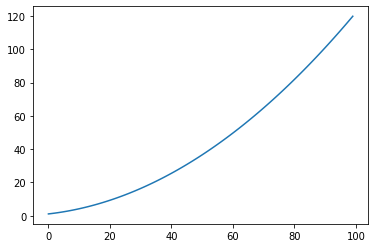

In [24]:
sbn.lineplot(step, prices)

# Large buy order with arb

In [34]:
# Let's start with a 1:1 price with a lot of size on the AMM
wamm = WAMM(1000, 1000)

# We'll add a large buy order
num_steps = 100
x_order = WhaleOrder(1e4, num_steps)
wamm.add_x_order(x_order)

# What happens to price as we execute this fully?
step = []
prices = []
filled = []
for i in range(num_steps):
    wamm.trade_batch()
    step.append(i)
    prices.append(wamm.last_y_price)
    filled.append(wamm.x_orders[0].qty_filled)
    
    # Add someone who will sell 50% per block at 100%
    if wamm.last_y_price > 2:
        arb_y_in = wamm.amm.y_reserves/2
        res = wamm.amm.trade(0, arb_y_in)

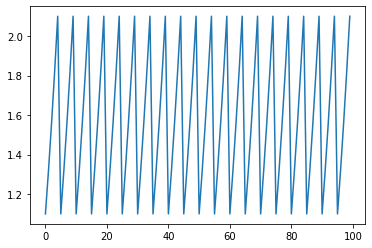

In [35]:
sbn.lineplot(step, prices)